In [3]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report


In [4]:
# Load and preprocess the dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize pixel values to be between 0 and 1
y_train = to_categorical(y_train, 10)  # Convert labels to one-hot encoding
y_test = to_categorical(y_test, 10)

4422102/4422102 [==============================] - 1s 0us/step


In [8]:
# Build the CNN architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))


In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [9]:
# Train the model
history = model.fit(x_train.reshape(-1, 28, 28, 1), y_train, epochs=10, validation_split=0.2)

Epoch 1/10


1500/1500 [==============================] - 6s 4ms/step - loss: 0.5439 - accuracy: 0.7987 - val_loss: 0.3919 - val_accuracy: 0.8593
Epoch 2/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.3471 - accuracy: 0.8733 - val_loss: 0.3535 - val_accuracy: 0.8656
Epoch 3/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2959 - accuracy: 0.8911 - val_loss: 0.3230 - val_accuracy: 0.8815
Epoch 4/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.2635 - accuracy: 0.9036 - val_loss: 0.2833 - val_accuracy: 0.8972
Epoch 5/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.2349 - accuracy: 0.9144 - val_loss: 0.2786 - val_accuracy: 0.8978
Epoch 6/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.2157 - accuracy: 0.9200 - val_loss: 0.2638 - val_accuracy: 0.9048
Epoch 7/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1971 - accuracy: 0.9275 - val_loss: 0.2691 - val_accurac

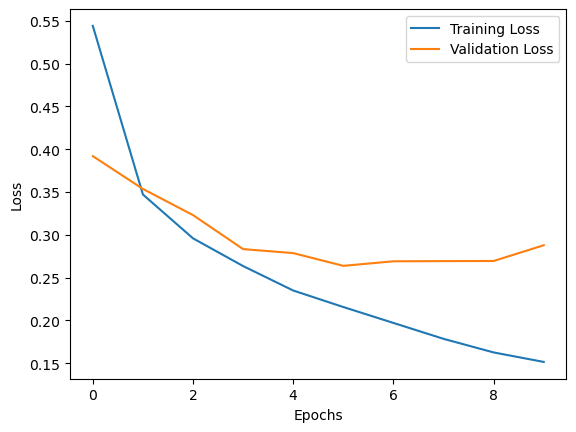

In [10]:
# Plot loss vs. val_loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

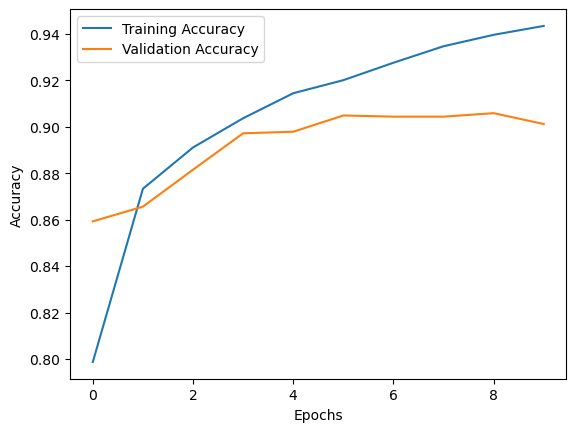

In [11]:
# Plot accuracy vs. val_accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [12]:
# Generate predictions on test_data
y_pred = model.predict(x_test.reshape(-1, 28, 28, 1))


313/313 [==============================] - 0s 1ms/step


In [13]:
# Convert predictions to labels
predicted_labels = tf.argmax(y_pred, axis=1)
true_labels = tf.argmax(y_test, axis=1)


In [14]:
# Compute Confusion matrix and classification report
conf_matrix = confusion_matrix(true_labels, predicted_labels)
class_report = classification_report(true_labels, predicted_labels)


In [15]:
print(conf_matrix)

[[867   1  16  31   6   0  74   0   5   0]
 [  1 982   0  12   2   0   1   0   2   0]
 [ 17   0 867  12  68   0  35   0   1   0]
 [ 12  10   9 923  23   0  21   0   2   0]
 [  1   1  57  30 888   0  23   0   0   0]
 [  1   0   0   0   0 964   0  20   1  14]
 [132   2  89  33 122   0 611   0  11   0]
 [  0   0   0   0   0   7   0 985   0   8]
 [  5   0   4   5   4   1   7   4 969   1]
 [  1   0   0   0   0   4   0  64   0 931]]


In [16]:
print(class_report)

              precision    recall  f1-score   support

           0       0.84      0.87      0.85      1000
           1       0.99      0.98      0.98      1000
           2       0.83      0.87      0.85      1000
           3       0.88      0.92      0.90      1000
           4       0.80      0.89      0.84      1000
           5       0.99      0.96      0.98      1000
           6       0.79      0.61      0.69      1000
           7       0.92      0.98      0.95      1000
           8       0.98      0.97      0.97      1000
           9       0.98      0.93      0.95      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000

